# All imports

In [4]:
print("User Current Version:-", sys.version)

User Current Version:- 3.9.2 (default, Mar  7 2021, 07:53:23) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-44)]


In [2]:
import os,sys,string, time
import pickle
print(sys.path)
print (sys.version)
from ipynb.fs.full.Utilities_neutrino import neutrino_energy
import ROOT
import seaborn as sns
from matplotlib.lines import Line2D
from math import *
from ROOT import gPad, TTree, TObject, TFile, gDirectory, TH1D, TH2D, TH3D, TCanvas, gROOT, TGaxis, gStyle, TColor, TLegend, THStack, TChain, TLatex, TText, TCollection, kRed, kBlue
from array import array
import math
import matplotlib.pyplot as plt
import awkward 
import plotly.express as px
import numpy as np
import matplotlib.ticker as tck
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show    
import uproot3
import matplotlib.cm as cm
import matplotlib.mlab as mlab

import pandas as pd

from root_pandas import read_root
from platform import python_version

import scipy as sci
from scipy import stats
import scipy.optimize as op

['/uboone/app/users/finnerud/python_scripts', '/cvmfs/uboone.opensciencegrid.org/products/ubutil/v09_32_00/slf7.x86_64.e20.prof/lib', '/cvmfs/uboone.opensciencegrid.org/products/ubutil/v09_32_00/python', '/cvmfs/uboone.opensciencegrid.org/products/ubutil/v09_32_00/bin', '/cvmfs/larsoft.opensciencegrid.org/products/larbatch/v01_56_02/python', '/cvmfs/larsoft.opensciencegrid.org/products/larbatch/v01_56_02/bin', '/cvmfs/fermilab.opensciencegrid.org/products/common/prd/sam_web_client/v3_0/NULL/python', '/cvmfs/fermilab.opensciencegrid.org/products/common/prd/python_future_six_request/v1_3_1/Linux64bit-3-10-2-17-python3-9', '/cvmfs/fermilab.opensciencegrid.org/products/common/prd/jobsub_client/v1_3_5/NULL', '/cvmfs/uboone.opensciencegrid.org/products/swtrigger/v02_03_00d/Linux64bit+3.10-2.17/python', '/cvmfs/uboone.opensciencegrid.org/products/larlite/v06_71_00d/Linux64bit+3.10-2.17-e20-prof/python', '/cvmfs/uboone.opensciencegrid.org/products/larcv/v06_71_00d/Linux64bit+3.10-2.17-e20-prof

# Opening the MC and data files

In [2]:
#MC
loc_file = '/uboone/data/users/davidc/searchingfornues/v08_00_00_48/0928/run3/nslice/prodgenie_bnb_nu_uboone_overlay_mcc9.1_v08_00_00_26_filter_run3_reco2_G_reco2.root'

#Data
data_file = '/uboone/data/users/davidc/searchingfornues/v08_00_00_41/cc0pinp/0617/nslice/data_bnb_peleeFilter_uboone_v08_00_00_41_pot_run3_G1_neutrinoselection_filt.root'

#EXT
EXT_file =   '/uboone/data/users/davidc/searchingfornues/v08_00_00_43/0702/run3/numupresel/data_extbnb_mcc9.1_v08_00_00_25_reco2_G_all_reco2.root'

MC_tree = uproot3.open(loc_file)['nuselection/NeutrinoSelectionFilter']
data_tree = uproot3.open(data_file)['nuselection/NeutrinoSelectionFilter']
EXT_tree = uproot3.open(EXT_file)['nuselection/NeutrinoSelectionFilter']

#Un-comment this line to see the variables available
#print(data_tree.keys())


# Flattening

In [27]:
MC_EXT = MC_EXT.apply(lambda x: x.explode() if x.name in ['trk_sce_end_z_v','trk_sce_end_y_v','trk_sce_end_x_v','trk_distance_v','trk_len_v','trk_score_v','trk_llr_pid_score_v','trk_sce_start_z_v','trk_sce_start_y_v','trk_sce_start_x_v','reco_nu_vtx_sce_x','reco_nu_vtx_sce_y', 'reco_nu_vtx_sce_z','topological_score'] else x).reset_index()

MC_EXT = MC_EXT.loc[:,~MC_EXT.columns.duplicated()]

In [28]:
MC_EXT = MC_EXT.apply(lambda x: x.explode() if x.name in ['trk_energy_proton_v'] else x).reset_index()
MC_EXT = MC_EXT.loc[:,~MC_EXT.columns.duplicated()]


# Make your selections here

In [10]:
reco_x = MC_EXT['reco_nu_vtx_sce_x']
reco_y = MC_EXT['reco_nu_vtx_sce_y']
reco_z = MC_EXT['reco_nu_vtx_sce_z']
trk_score_v = MC_EXT['trk_score_v']
trk_dis_v = MC_EXT['trk_distance_v']
neutrino_energy = MC_EXT['trk_energy_tot']




selection =  (neutrino_energy > 0) & (neutrino_energy < 1.6) & (trk_dis_v > -1000) & (trk_dis_v < 5) & (trk_score_v > 0.5) & (reco_x > 5) & (reco_x < 251) & (reco_y < 110) & (reco_y > -110)\
                & (reco_z < 986) & (reco_z > 20) & ((reco_z < 675) | (reco_z > 775))

MC_EXT = MC_EXT[selection]

# Plot the variables 

In [ ]:
#pd.set_option('display.max_rows', 100)
#pd.set_option('display.max_columns', 31)
#MC_EXT.head(100)

# Plot the energy spectrums here and normalise

In [11]:
plt.rcParams.update({'font.size': 22})
plt.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)

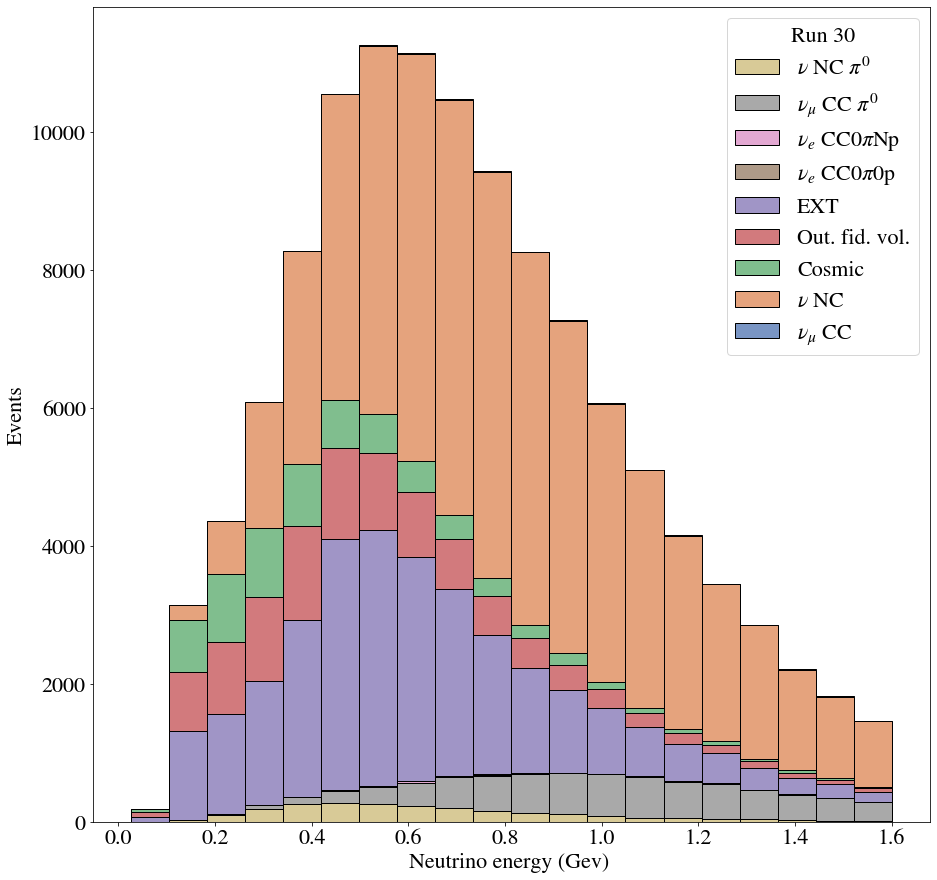

In [12]:
plt.figure(figsize=(15,15))
i = sns.histplot(data=MC_EXT, x="trk_energy_tot", hue="category", multiple="stack", palette = 'deep', legend = False, weights = MC_EXT['weightSplineTimesTune']/(MC_EXT['scaling']), bins = 20)
i.set(xlabel="Neutrino energy (Gev) ", ylabel = "Events")
plt.legend(title='Run 30', loc='upper right', labels=[r"$\nu$ NC $\pi^{0}$", r"$\nu_{\mu}$ CC $\pi^{0}$", r"$\nu_e$ CC0$\pi$Np", r"$\nu_e$ CC0$\pi$0p", r"EXT", r"Out. fid. vol.", r"Cosmic", r"$\nu$ NC", r"$\nu_{\mu}$ CC", r"$\nu_e$ CC"])
plt.savefig('vertex_x1.jpg', dpi=300)
plt.show(i)

In [13]:
print('test')

test
